# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
weather_api_key

'c51718a8fe1f408977826bbb65188383'

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [11]:
#containers for data
city_names = []
countries = []
latitudes = []
longitudes = []
temperatures = []
humidities = []
cloudy_skies = []
windiness = []

In [12]:
for city in cities:
    try:
        #get the data into json format
        response = requests.get(query_url + city).json()
        
        #store data into lists
        city_names.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudy_skies.append(response["clouds"]["all"])
        windiness.append(response["wind"]["speed"])
        temperatures.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        countries.append(response['sys']['country'])
        print(f"{city}'s' information is processed")
        print("-" * 30)
    except:
        continue
        #cities not listed in the output were not found in the API
       

constitucion's' information is processed
------------------------------
hobart's' information is processed
------------------------------
tessalit's' information is processed
------------------------------
sakassou's' information is processed
------------------------------
upernavik's' information is processed
------------------------------
aklavik's' information is processed
------------------------------
muroto's' information is processed
------------------------------
busselton's' information is processed
------------------------------
carnarvon's' information is processed
------------------------------
teya's' information is processed
------------------------------
nara's' information is processed
------------------------------
adrar's' information is processed
------------------------------
tselinnoye's' information is processed
------------------------------
ponta do sol's' information is processed
------------------------------
lorengau's' information is processed
--------------

tubuala's' information is processed
------------------------------
katsuura's' information is processed
------------------------------
codrington's' information is processed
------------------------------
lensk's' information is processed
------------------------------
avarua's' information is processed
------------------------------
deep river's' information is processed
------------------------------
faanui's' information is processed
------------------------------
atambua's' information is processed
------------------------------
georgetown's' information is processed
------------------------------
pisco's' information is processed
------------------------------
challans's' information is processed
------------------------------
palmer's' information is processed
------------------------------
san jeronimo's' information is processed
------------------------------
chaoyang's' information is processed
------------------------------
rawson's' information is processed
-----------------

hithadhoo's' information is processed
------------------------------
nhulunbuy's' information is processed
------------------------------
brigham city's' information is processed
------------------------------
pimentel's' information is processed
------------------------------
geraldton's' information is processed
------------------------------
vagay's' information is processed
------------------------------
aniva's' information is processed
------------------------------
port macquarie's' information is processed
------------------------------
acapulco's' information is processed
------------------------------
moose factory's' information is processed
------------------------------
stromness's' information is processed
------------------------------
cape coast's' information is processed
------------------------------
patiya's' information is processed
------------------------------
clyde river's' information is processed
------------------------------
skjervoy's' information is proce

atherton's' information is processed
------------------------------
broken hill's' information is processed
------------------------------
eston's' information is processed
------------------------------
moussoro's' information is processed
------------------------------
tovacov's' information is processed
------------------------------
cidreira's' information is processed
------------------------------
timaru's' information is processed
------------------------------
valley city's' information is processed
------------------------------
smithers's' information is processed
------------------------------
meulaboh's' information is processed
------------------------------
deputatskiy's' information is processed
------------------------------
puerto del rosario's' information is processed
------------------------------
betioky's' information is processed
------------------------------
pavlivka's' information is processed
------------------------------
luanda's' information is processed
-

bambanglipuro's' information is processed
------------------------------
bojnurd's' information is processed
------------------------------
aykhal's' information is processed
------------------------------
kenai's' information is processed
------------------------------
severnoye's' information is processed
------------------------------
worland's' information is processed
------------------------------
maxixe's' information is processed
------------------------------
totonicapan's' information is processed
------------------------------
trzebinia's' information is processed
------------------------------
jinchang's' information is processed
------------------------------
nanortalik's' information is processed
------------------------------
leesburg's' information is processed
------------------------------
leh's' information is processed
------------------------------
draguseni's' information is processed
------------------------------
matsusaka's' information is processed
-----------

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame({
    "City": city_names,
    "Country": countries,
    "Latitude":latitudes,
    "Longitude": longitudes,
    "Temperatures": temperatures,
    "Humidity": humidities,
    "Cloudiness": cloudy_skies,
    "Windiness" : windiness
})
weather_df.head()

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness
0,Constitución,CL,-35.3333,-72.4167,56.25,92,0,4.63
1,Hobart,AU,-42.8794,147.3294,60.01,54,75,19.57
2,Tessalit,ML,20.1986,1.0114,65.59,24,40,16.98
3,Sakassou,CI,7.4546,-5.2926,78.80,83,75,7.05
4,Upernavik,GL,72.7868,-56.1549,18.30,80,89,5.28


In [14]:
weather_df.to_csv("./Data/weather_info.csv")

In [15]:
weather_df.count()

City            567
Country         567
Latitude        567
Longitude       567
Temperatures    567
Humidity        567
Cloudiness      567
Windiness       567
dtype: int64

In [16]:
weather_df.value_counts()

City                           Country  Latitude  Longitude  Temperatures  Humidity  Cloudiness  Windiness
‘Ewa Beach                     US        21.3156  -158.0072   69.80        72        1           3.44         1
Hauterive                      FR        46.0901   3.4459     39.20        65        75          3.00         1
Hermanus                       ZA       -34.4187   19.2345    79.00        59        21          1.99         1
Henstedt-Ulzburg Municipality  DE        53.7833   10.0000    27.00        54        0           23.02        1
Hendrina                       ZA       -26.1588   29.7153    75.99        64        75          4.61         1
                                                                                                             ..
Pevek                          RU        69.7008   170.3133  -10.79        84        0           4.74         1
Phonhong                       LA        18.5007   102.4166   86.00        42        20          9.22        

Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df["Humidity"] > 100]

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"There are no cities with humidities > 100%")

There are no cities with humidities > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

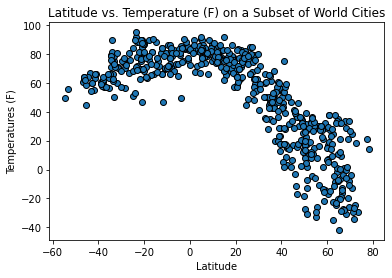

In [19]:
plt.scatter(weather_df.Latitude, weather_df.Temperatures, edgecolors="black")
plt.title("Latitude vs. Temperature (F) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperatures (F)")
plt.savefig("./Images/lat_temp.png")
plt.show()
plt.close()

In [20]:
##Latitude vs Temperature plot
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Temperatures)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of {r_squared}, which exhibits a moderate correlation")

The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of 0.57, which exhibits a moderate correlation


## Latitude vs. Humidity Plot

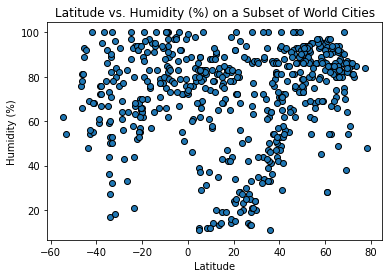

In [21]:
plt.scatter(weather_df.Latitude, weather_df.Humidity, edgecolors="black")
plt.title("Latitude vs. Humidity (%) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/lat_humid.png")
plt.show()
plt.close()

In [22]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Humidity)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. humidity plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. humidity plot has no correlation. It has a r_squared value of 0.01.


## Latitude vs. Cloudiness Plot

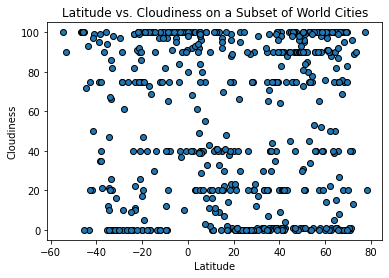

In [23]:
plt.scatter(weather_df.Latitude, weather_df.Cloudiness, edgecolors="black")
plt.title("Latitude vs. Cloudiness on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("./Images/lat_cloudiness.png")
plt.show()
plt.close()

In [24]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Cloudiness)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. cloudiness plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. cloudiness plot has no correlation. It has a r_squared value of 0.0.


## Latitude vs. Wind Speed Plot

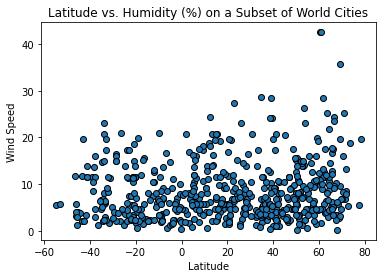

In [25]:
plt.scatter(weather_df.Latitude, weather_df.Windiness, edgecolors="black")
plt.title("Latitude vs. Humidity (%) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("./Images/lat_winds.png")
plt.show()
plt.close()

In [26]:
print(f"The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes")

The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes


## Linear Regression

In [27]:
northern_hemis = weather_df.loc[weather_df.Latitude > 0]
southern_hemis = weather_df.loc[weather_df.Latitude < 0]

In [28]:
def to_linear_regress(x, y):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, edgecolors="black")
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is : {pearson_r}")
    return line_eq

In [29]:
# to show line equation on graph
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="magenta")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


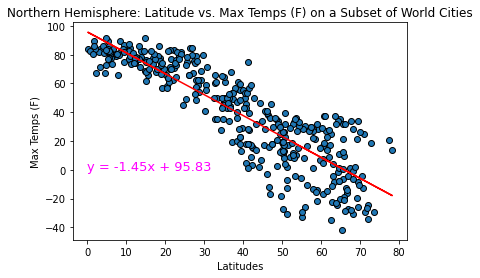

In [30]:
northern_max_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Temperatures)
plt.title("Northern Hemisphere: Latitude vs. Max Temps (F) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Max Temps (F)")

to_annotate(northern_max_line,0, 0)

plt.savefig("./Images/lats_northern_temps.png")
plt.show()
plt.close()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5


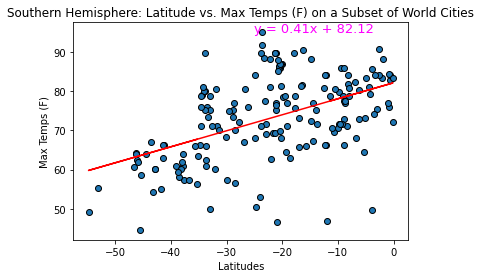

In [31]:
southern_max_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Temperatures)
plt.title("Southern Hemisphere: Latitude vs. Max Temps (F) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Max Temps (F)")

to_annotate(southern_max_line, -25, 95)

plt.savefig("./Images/lats_southern_temps.png")
plt.show()
plt.close()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


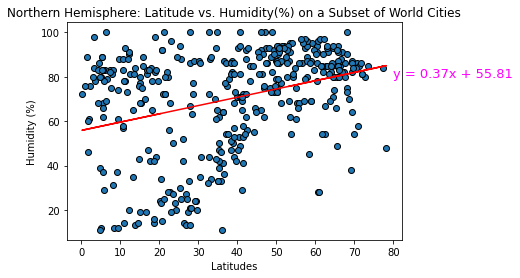

In [32]:
northern_humid_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Humidity)
plt.title("Northern Hemisphere: Latitude vs. Humidity(%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")

to_annotate(northern_humid_line, 80, 80)

plt.savefig("./Images/lats_northern_humidity.png")
plt.show()
plt.close()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.3


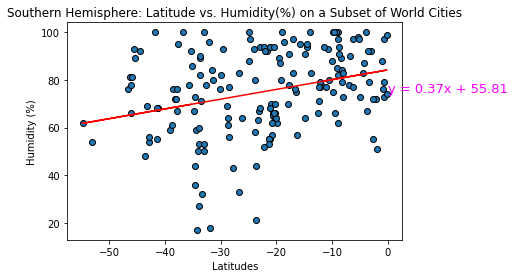

In [33]:
southern_humid_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Humidity)
plt.title("Southern Hemisphere: Latitude vs. Humidity(%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")

to_annotate(northern_humid_line, 0, 75)

plt.savefig("./Images/lats_southern_humidity.png")
plt.show()
plt.close()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.16


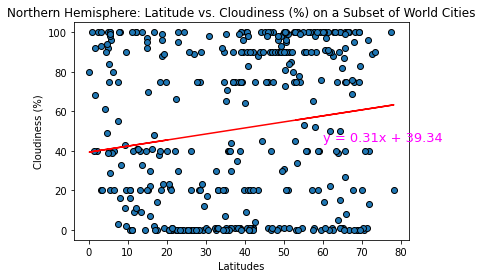

In [34]:
northern_cloudy_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Cloudiness)
plt.title("Northern Hemisphere: Latitude vs. Cloudiness (%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

to_annotate(northern_cloudy_line, 60, 45)

plt.savefig("./Images/lats_northern_cloudiness.png")
plt.show()
plt.close()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.19


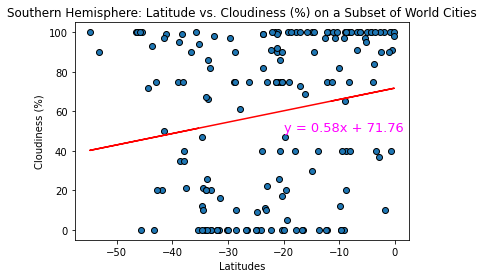

In [35]:
southern_cloudy_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Cloudiness)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (%) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

to_annotate(southern_cloudy_line, -20, 50)

plt.savefig("./Images/lats_southern_cloudiness.png")
plt.show()
plt.close()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


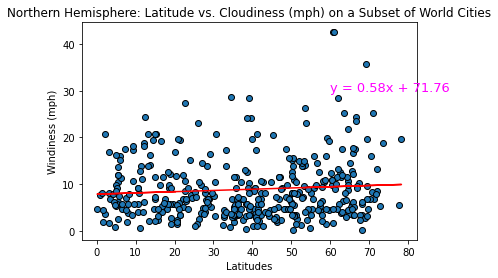

In [36]:
northern_windy_line = to_linear_regress(northern_hemis.Latitude, northern_hemis.Windiness)
plt.title("Northern Hemisphere: Latitude vs. Cloudiness (mph) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Windiness (mph)")

to_annotate(southern_cloudy_line, 60, 30)

plt.savefig("./Images/lats_northern_speeds.png")
plt.show()
plt.close()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.13


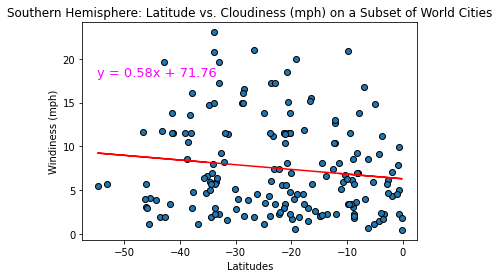

In [37]:
southern_windy_line = to_linear_regress(southern_hemis.Latitude, southern_hemis.Windiness)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (mph) on a Subset of World Cities")
plt.xlabel("Latitudes")
plt.ylabel("Windiness (mph)")

to_annotate(southern_cloudy_line, -55,18)

plt.savefig("./Images/lats_southern_speeds.png")
plt.show()
plt.close()